In [38]:
#Importing reguired Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv(r"C:\FSDS_GENAI2\Customer_Churn_Prediction_Project\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [40]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
data.shape

(7043, 21)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
# to get summary statistics
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [44]:
# Check for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
# Drop the customer ID column
data.drop('customerID', axis=1, inplace=True)
# convert TotalCharges to numeric(handle spaces as NaN )
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
#Drop rows where TotalCharges is NaN
data.dropna(inplace=True)
# convert target variables 'Churn' to binary values: yes-> 1, NO-> 0
data['Churn'] = data['Churn'].map({'Yes': 1, 'No':0})
#Onw hot encode categorical variables(excluding target and numeric ones)
data = pd.get_dummies(data, drop_first=True)

# Check final data structure
print("Cleaned dataset:", data.shape)

data.head()


Cleaned dataset: (7032, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [46]:

# Train a Machine Learning model

# Split the data into Features(x) and Target(y)
x = data.drop('Churn', axis = 1)
y = data['Churn']
# split the data into Train and Test Sets
# We will use 80% of the data for training and 20% for testing

from sklearn.model_selection import train_test_split
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)

#Train the model
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# predict on the scaled test set
y_pred = model.predict(x_test_scaled)

# print evaluation results
print("Acuuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Acuuracy: 0.7874911158493249

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


 Confusion Matrix:
 [[915 118]
 [181 193]]


In [49]:
# Train and Evaluate Rando Forest
# step1 Import and train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the model
rf_model = RandomForestClassifier(random_state=42)

#Train the model on scaled training data
rf_model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# predict and evaluate
# make predictions
rf_pred = rf_model.predict(x_test_scaled)
 
# evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\n Classification Report:\n", classification_report(y_test, rf_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Random Forest Accuracy: 0.7846481876332623

 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407


 Confusion Matrix:
 [[927 106]
 [197 177]]


In [51]:
# Train with class_weight = balanced' to handle imbalance
rf_model_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_balanced.fit(x_train_scaled, y_train)

#redict and evaluate
rf_pred_bal = rf_model_balanced.predict(x_test_scaled)

print("Random Forest (Balanced) Accuracy:", accuracy_score(y_test, rf_pred_bal))

print("\nClassification Report:\n", classification_report(y_test, rf_pred_bal))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred_bal))

Random Forest (Balanced) Accuracy: 0.7839374555792467

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.45      0.53       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407


Confusion Matrix:
 [[934  99]
 [205 169]]


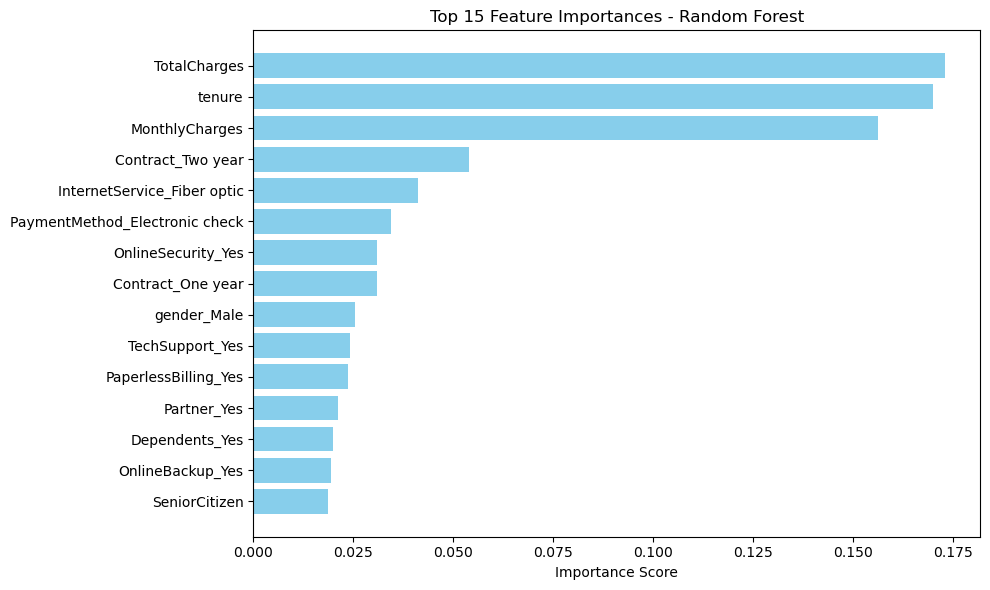

In [52]:
# Plot Feature Im[portance from Random Forest
# Get feature importances
importances = rf_model_balanced.feature_importances_
features = x.columns  # original feature names before scaling

#create a DataFrame for sorting
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# plot the 15 features
plt.figure(figsize=(10,6))
plt.title("Top 15 Feature Importances - Random Forest")
plt.barh(importance_df['Feature'][:15][::-1], importance_df['Importance'][:15][::-1], color='skyblue')
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [58]:
# Save the trained Model
import joblib

joblib.dump(rf_model_balanced, 'churn_model.pkl')



['churn_model.pkl']

In [59]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [60]:
import os
print(os.getcwd())

C:\Users\Geetha
